#**Mini-Project 2: Time Series Forecasting using NN, LSTM and CNN** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Implementation: Addtional Feature 2- Stock prediction for continuous future time period- 5 days**

######Import required helper functions

In [ ]:
%cd "/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/"
!pip install import-ipynb
import import_ipynb

# importing helper functions for data preprocessing and model visualization
import plotlib_helper as graphplot
import datapreprocess_helper as dataprep

path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/data"
dnn_path="/content/drive/My Drive/P2_TimeForecast/P2_CodeBase/dnn"

/content/drive/My Drive/P2_TimeForecast/P2_CodeBase
importing Jupyter notebook from plotlib_helper.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
importing Jupyter notebook from datapreprocess_helper.ipynb
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Function to load and preprocess data**

In [ ]:
import pandas as pd
import os
import numpy as np 
import copy

def load_encode():
  filename_read = os.path.join(path,"CSC215_P2_Stock_Price.csv")
  df = pd.read_csv(filename_read,na_values=['NA','?','-'])
  print("dataset:", df.shape)
  dropCols=['Date','Adj_Close']
  df=dataprep.dataset_clean(df,dropCols)

  x=df
  y=copy.deepcopy(df['Close'])
  print(x.shape, y.shape)

  #encode input columns
  for col in x.columns:
    dataprep.encode_numeric_zscore(x,col)

  x = x.to_numpy(dtype="float32")
  y = y.to_numpy(dtype="float32")
  print("Initial shape: ",x.shape, y.shape)

  return x,y

### **Function to create input data to model**

In [ ]:
import numpy as np

def this_to_sequences(seq_size, input,target,future_days):
    x = []
    y = []

   
    for i in range(len(input)-seq_size-1):
        window = input[i:(i+seq_size)]       
        window = [x for x in window]
        x.append(window)
    
    for i in range(len(target)-seq_size-future_days):
        #print(i)
        after_window = target[i+seq_size:i+seq_size+future_days]       
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [ ]:
sequence_size=7

print("sequence_size",sequence_size)
print("Loading data....")
x,y=load_encode()
print("Shape of x and y before sequencing", x.shape,y.shape)
x,y=this_to_sequences(7,x,y,5)
print("Shape of x and y after sequencing", x.shape,y.shape)
print(x.shape,y.shape)

print(x.shape[0]-y.shape[0])
x=x[:-(x.shape[0]-y.shape[0]),:]
print("Balance data set", x.shape,y.shape)
print(x.shape,y.shape)


sequence_size 7
Loading data....
dataset: (4392, 7)
dataset after dropping NA rows:  (4392, 7)
dataset after dropping  ['Date', 'Adj_Close']  columns:  (4392, 5)
(4392, 5) (4392,)
Initial shape:  (4392, 5) (4392,)
Shape of x and y before sequencing (4392, 5) (4392,)
Shape of x and y after sequencing (4384, 7, 5) (4380, 5)
(4384, 7, 5) (4380, 5)
4
Balance data set (4380, 7, 5) (4380, 5)
(4380, 7, 5) (4380, 5)


### **Identify RMSE for future days prediction= 5 days**

x_train shape: (3066, 7, 5)
x_test shape: (1314, 7, 5)
y_train shape: (3066, 5)
y_test shape: (1314, 5)

Training samples: 3066
Test samples: 1314
0
Model training begins.....
1
Model training begins.....
2
Model training begins.....
3
Model training begins.....
4
Model training begins.....
Time elapsed (hh:mm:ss.ms) 0:01:33.832093
Model prediction begins.....
-------- Performance Evalutation for  LSTM- Additional feature 2  --------
-------- Parameters:  {'optimizer': ['adam']}  --------

RMSE         : 1.6246797
MSE          : 2.639584
R2 score     : 0.9968654756336047
-------- Regression Chart --------


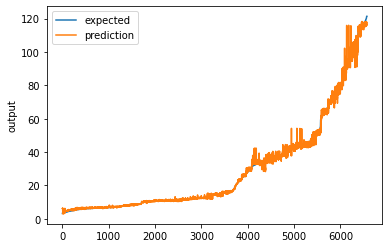

Score (RMSE): 1.624679684638977


Predicted:
[[ 6.086471   6.1369653  6.111865   6.1676126  6.0976586]
 [26.401262  26.388433  26.467821  26.37481   26.477577 ]
 [10.8190975 10.778216  10.777855  10.81738   10.840519 ]
 [90.13427   90.05359   89.96259   90.01301   90.1324   ]
 [42.501976  42.672318  42.620758  42.709236  42.687317 ]]
Expected:
[[ 5.6225  5.575   5.7425  5.8375  5.94  ]
 [25.685  25.5425 25.7025 26.1275 26.375 ]
 [11.055  11.185  11.2375 11.2325 11.23  ]
 [89.2    85.04   86.86   85.8    84.3   ]
 [43.08   42.71   42.765  43.3    44.1   ]]


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Bidirectional
import numpy as np
from datetime import datetime
from sklearn import metrics
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import ModelCheckpoint

optimizer=["adam"]
parameters={'optimizer': optimizer}

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=120)
graphplot.data_details(x_train,y_train,x_test,y_test)

bestModelPath=os.path.join(dnn_path,"P2_AdditionalFeature2_BestModel.hdf5")

checkpointer = ModelCheckpoint(filepath=bestModelPath, verbose=0, save_best_only=True) # save best model
start_time = datetime.now()
ip_size = (x_train.shape[1] , x_train.shape[2])
           
for i in range(5):
  print(i)
  print("Model training begins.....")
  model = Sequential()
  model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1, input_shape=ip_size))
  model.add(Dense(50))
  model.add(Dense(5))
  model.compile(loss='mean_squared_error', optimizer='adam')
  monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=4, verbose=0, mode='auto')
  model.fit(x_train,y_train,validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=0, epochs=100)  

model.load_weights(bestModelPath)
time_elapsed = datetime.now() - start_time
print('Time elapsed (hh:mm:ss.ms) {}'.format(time_elapsed))

print("Model prediction begins.....")
pred = model.predict(x_test)

graphplot.regression_performance_metrics(y_test,pred,"LSTM- Additional feature 2", parameters)
graphplot.chart_regression(pred.flatten(),y_test)

score = np.sqrt(metrics.mean_squared_error(pred, y_test))

print("Score (RMSE): {}".format(score))
print()
print()

print("Predicted:")
print(np.array(pred[0:5]))

print("Expected:")
print(np.array(y_test[0:5]))
